#### This notebook contains implementation of Linear Regression in 1 variable.  

**Summary of steps followed:**  
1. Create function- compute_model_output()  
    This function takes in xtrain, parameters w and b, computes output of the model using these parameters and returns a 1-D vector with model output.  

2. Create function- compute_cost()  
    This function computes least squared error cost.  

3. Create function- compute_gradient()  
    This function computes partial deriavate of the cost function w.r.t to each parameter w and b. It returns the gradient values of w and b.  

4. Create function- gradient_descent()  
    This function is used to run the Gradient Descent algorithm to find optimum values of w and b. It returns cost history, parameters history, final values of w and b.  

5. Create data- xtrain, ytrain. Initialize values for learning rate 'alpha', number of steps in GD- 'iterations', initial parameter values 'w' and 'b'.  

6. Call gradient_descent() and store the returned values.  

7. Plot Cost vs number of iterations to observe the progress of the GD algo.  

8. Compute model prediction on xtrain data using the final parameters 'final_w' and 'final_b'.  

9. Plot this model prediction as regression line along with xtrain data as scatterplot.  

10. Impact of changing number of iterations.
        i) Cost vs iterations- Create 4 subplots keeping iterations = 50, 100, 150, 200.
        ii) 3 Regression lines- model output with xtrain data, keeping iterations = 50, 100, 150  

11. Impact of changing learning rate, keeping iterations = 50.  
        i) Cost vs iteration- 2 subplots- learning rate = 0.1, 0.01  
        ii) 2 Regression lines in plot- learning rate = 0.1, 0.01

In [1]:
#loading all libraries
import numpy as np
import matplotlib.pyplot as plt
import math

#### Define the cost function (least squared error cost function)

In [2]:
#Least squared error cost function
def compute_cost(xtrain, ytrain, w, b):
    """
    Objective- to compute the least squared error cost
    Parameters-
    xtrain- m training samples, only 1 variable
    ytrain- m target outputs
    w and b- parameters of linear reg model
    """
    f_wb = 0.0 #stores the model output
    sq_error = 0.0 #stores the sum of square of errors
    cost = 0.0
    
    #total number of samples
    m = xtrain.shape[0]
    for i in range(m):
        f_wb = xtrain[i]*w + b
        sq_error = sq_error + (f_wb - ytrain[i])**2
    cost = sq_error/(2*m)
    return cost

#### Define the gradient function

It computes the partial derivate of least-squared error cost function with respect to each parameter w and b.

In [3]:
#function to compute gradient of w and b for 1 feature
def compute_gradient(xtrain, ytrain, w, b):
    """
    Objective- compute partial derivate of cost w.r.t parameters w and b
    Arguments- 
    xtrain (nd-array, m samples)- training samples, m  observations
    ytrain (1-d array, m)- target outputs, m observations
    w & b- parameters for linear model
    Returns-
    gradient_w, gradient_b- calculated gradients for w and b
    """
    gradient_w, gradient_b = 0.0, 0.0
    m = ytrain.shape[0]
    
    for i in range(m):
        predicted_output = xtrain[i]*w + b
        gradient_w_i = (predicted_output - ytrain[i])*xtrain[i]
        gradient_b_i = predicted_output - ytrain[i]
        gradient_w = gradient_w + gradient_w_i
        gradient_b = gradient_b + gradient_b_i
    gradient_w = gradient_w/m
    gradient_b = gradient_b/m
    
    return gradient_w, gradient_b
    

#### Define function that runs gradient descent algorithm

It returns list of cost & parameter history at each step of GD.

In [4]:
#Gradient descent function
def gradient_descent(xtrain,ytrain,w,b,alpha,iterations,compute_cost,compute_gradient):
    """
    Objective- perform gradient descent to fit w and b. Perform 'iterations' number of steps
    with learning rate 'alpha'.
    Args- 
    xtrain, ytrain (1-D array with m observations)- training samples
    alpha- learning rate
    iterations- number of steps in GD
    compute_cost- function to compute the cost
    compute_gradient- function to compute partial derivate of parameters w and b
    Returns-
    J_history- cost of the model at ith iteration.
    p_history- history of parameters [w,b]
    w,b (scalar)- updated value of w and b after step of gradient descent
    """
    J_history = [] #stores iteration number and cost computed at this iteration
    p_history = [] #stores w and b at an iteration
    w_in = w
    b_in = b
    for i in range(iterations):
        
        #computing gradient of w and b
        gradient_w, gradient_b = compute_gradient(xtrain,ytrain,w_in,b_in)
        
        #updating both parameters
        w_in = w_in - alpha*gradient_w
        b_in = b_in - alpha*gradient_b
        #computing cost and storing in array for plotting purpose later
        #this check ensures resourses do not get exhausted due to large number of steps
        if i < 100000:
            J_history.append([i, compute_cost(xtrain,ytrain,w_in,b_in)])
            p_history.append([i,w_in,b_in])
        
        
        #print cost and parameters for some iterations
        if i%math.ceil(iterations/10) == 0:
            print(f"Iteration: {i}, Cost: {J_history[i][1]:.3e}",
                 f"Gradient_w: {gradient_w:.3e}, Gradient_b: {gradient_b:.3e}",
                 f"w: {w_in:.3e}, b: {b_in:.3e}")
    
    return J_history, p_history, w_in, b_in

**I've created 2 dataset samples- one with only 2 data points, the other with 6 datapoints.**  
            -'xtrain' contains size of house in 1000sqft. So, 1.0 refers to 1000sqft house.  
            -'ytrain' contains price of house in 1000 dollars. So, 300.0 refers to 300,000 dollars.

In [5]:
#Training data- 2 data points only
xtrain1 = np.array([1.0, 2.0])
ytrain1 = np.array([300.0, 500.0])

#Training data- more data points
xtrain2 = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
ytrain2 = np.array([250, 300, 480, 430, 630, 730])

#### Distribution of data points in both training sets

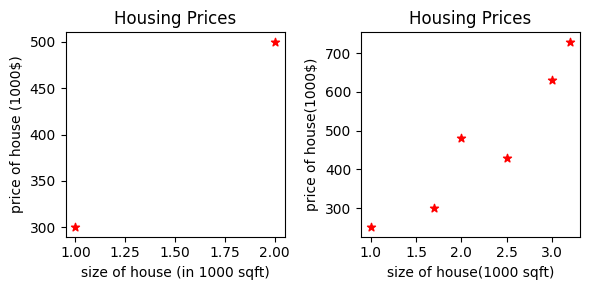

In [6]:
#Scatter plot for training samples with 2 data points

#set size of figure
plt.figure(figsize = (6,3))
#create plots for both training data side by side.
plt.subplot(1,2,1)   #1 row 1, 2 columns, plot index 1

#Plotting the training samples
plt.scatter(xtrain1, ytrain1, marker = "*", c = "red")
#setting the title
plt.title("Housing Prices")
#xlabel
plt.xlabel("size of house (in 1000 sqft)")
#ylabel
plt.ylabel("price of house (1000$)")

#Scatter plot for training data with multiple samples

plt.subplot(1,2,2)  #1 row 1, 2 columns, plot index 2
#creating scatter plot
plt.scatter(xtrain2, ytrain2, marker = "*", c = "red")
#set title
plt.title("Housing Prices")
#set xlabel
plt.xlabel("size of house(1000 sqft)")
#set ylabel
plt.ylabel("price of house(1000$)")

#space between both subplots
plt.tight_layout()

#display the plot
plt.show()

#### Define function to compute the model prediction
It will be used to compute model prediction for a given set of parameters w and b, which will then be used to create regression line in plots.

In [7]:
#Computing the model output for given w,b
def compute_model_output(xtrain,ytrain, w, b):
    """"
    objective- compute the output of linear regression model
    parameters- 
    xtrain (nd-array, m samples)- training samples
    w and b- model parameters
    """
    m = ytrain.shape[0]
    #creating vector of size m to store model output
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*xtrain[i] + b
    return f_wb 

Just trying out previous **`compute_model_output()`** function with random values of w and b.
The output has been used to create the regression line in plot below.

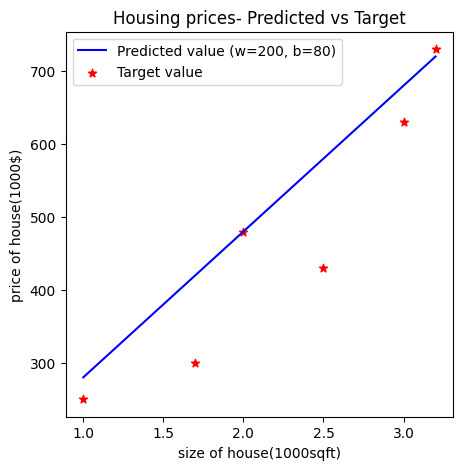

In [8]:
#calling the model to compute outputs
w,b = 200,80
#number of observations
m = ytrain2.shape[0]
y_predicted2 = compute_model_output(xtrain2,ytrain2, w, b)

#plotting the predicted output over our original data

#size of figure
plt.figure(figsize = (5,5))
#regression line
plt.plot(xtrain2, y_predicted2, c = "blue", label = "Predicted value (w=200, b=80)")
#original data points
plt.scatter(xtrain2, ytrain2, marker = "*", c = "red", label = "Target value")
#title
plt.title("Housing prices- Predicted vs Target")
#xlabel
plt.xlabel("size of house(1000sqft)")
#ylabel
plt.ylabel("price of house(1000$)")
#display legend with the two labels
plt.legend()
#display
plt.show()

#### Call to gradient descent function.

Remaining metrics have been initialized- learning rate, number of steps ('iterations'), initial values of w and b.

In [9]:
#Calling GD function

#some initializations
#learning rate
alpha = 0.01
iterations = 50
w,b = 70,-100
J_history, p_history, final_w, final_b = gradient_descent(xtrain2,ytrain2,w,b,alpha,
                                                          iterations,compute_cost,compute_gradient)
#printing w and b found by gradient descent
print(f"\nParameters after Gradient Descent- w: {final_w:.3f}, b:{final_b:.3f}")

Iteration: 0, Cost: 8.147e+04 Gradient_w: -1.004e+03, Gradient_b: -4.137e+02 w: 8.004e+01, b: -9.586e+01
Iteration: 5, Cost: 4.260e+04 Gradient_w: -7.181e+02, Gradient_b: -2.970e+02 w: 1.213e+02, b: -7.884e+01
Iteration: 10, Cost: 2.270e+04 Gradient_w: -5.134e+02, Gradient_b: -2.135e+02 w: 1.508e+02, b: -6.660e+01
Iteration: 15, Cost: 1.251e+04 Gradient_w: -3.670e+02, Gradient_b: -1.537e+02 w: 1.719e+02, b: -5.780e+01
Iteration: 20, Cost: 7.288e+03 Gradient_w: -2.622e+02, Gradient_b: -1.110e+02 w: 1.869e+02, b: -5.146e+01
Iteration: 25, Cost: 4.615e+03 Gradient_w: -1.873e+02, Gradient_b: -8.035e+01 w: 1.977e+02, b: -4.687e+01
Iteration: 30, Cost: 3.246e+03 Gradient_w: -1.336e+02, Gradient_b: -5.845e+01 w: 2.054e+02, b: -4.354e+01
Iteration: 35, Cost: 2.545e+03 Gradient_w: -9.522e+01, Gradient_b: -4.277e+01 w: 2.108e+02, b: -4.111e+01
Iteration: 40, Cost: 2.186e+03 Gradient_w: -6.775e+01, Gradient_b: -3.155e+01 w: 2.147e+02, b: -3.932e+01
Iteration: 45, Cost: 2.002e+03 Gradient_w: -4.81

After running GD, the final values of w and b have been used to estimate the model output.  
Just checking how good do the parameters fit training samples.  
Regression line for both training sets has been plotted with the original 'xtrain*' data points.

In [10]:
#Using final_w, final_b to compute outcomes on training data

#Training data 1- 2 observations
f_x1 = compute_model_output(xtrain1,ytrain1,final_w,final_b)
#training data 2- multiple observatins
f_x2 = compute_model_output(xtrain2, ytrain2, final_w, final_b)

In [11]:
#values in f_x with corresponding values in ytrain
print("Training sample 1- 2 observations only")
for i in range(ytrain1.shape[0]):
    print(f"Target output ytrain: {ytrain1[i]}, Computed output: {f_x1[i]}")

#Model output for the 2nd training set with 6 data points.
print("\nTarget and Model output for 2nd training set")
for i in range(ytrain2.shape[0]):
    print(f"Target output: {ytrain2[i]}, Computed output: {f_x2[i]}")

Training sample 1- 2 observations only
Target output ytrain: 300.0, Computed output: 181.96616718695302
Target output ytrain: 500.0, Computed output: 401.1072603445424

Target and Model output for 2nd training set
Target output: 250, Computed output: 181.96616718695302
Target output: 300, Computed output: 335.3649323972656
Target output: 480, Computed output: 401.1072603445424
Target output: 430, Computed output: 510.6778069233371
Target output: 630, Computed output: 620.2483535021317
Target output: 730, Computed output: 664.0765721336496


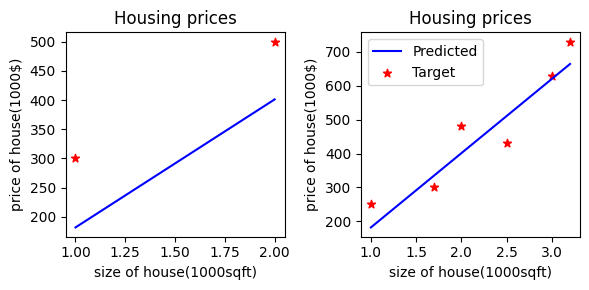

In [12]:
#Plotting the regression lines for both training samples

#set figure size, this sets figure size for entire plot & not each subplot
plt.figure(figsize = (6,3))

#Subplot 1

#set 2 subplots in 1 row.
plt.subplot(1,2,1) #total 1 row, 2 columns. current plot index 1

#the regression line
plt.plot(xtrain1, f_x1, c = "blue", label = "Predicted")
#scatter plot with original data points
plt.scatter(xtrain1, ytrain1, c = "red", marker = "*", label = "Target")
#plot title
plt.title("Housing prices")
#xlabel
plt.xlabel("size of house(1000sqft)")
#ylabel
plt.ylabel("price of house(1000$)")

#Subplot 2

plt.subplot(1,2,2) #1 row, 2 columns, current plot index 2

#the regression line
plt.plot(xtrain2, f_x2, c = "blue", label = "Predicted")
#scatter plot with original data points
plt.scatter(xtrain2, ytrain2, c = "red", marker = "*", label = "Target")
#plot title
plt.title("Housing prices")
#xlabel
plt.xlabel("size of house(1000sqft)")
#ylabel
plt.ylabel("price of house(1000$)")

#show legend
plt.legend()

#set space between both plots
plt.tight_layout()

#display plot
plt.show()

A plot of cost vs. number of iterations is useful in determining progress of GD algo.  
From the plot below, we can see that the cost decreases and stabilizes at around ~1900 in 50 iterations.  
Upon increasing number of iterations now, the cost starts increasing.

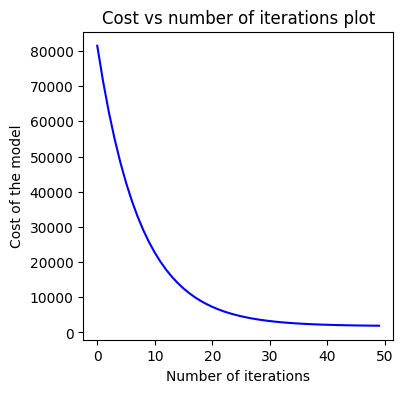

In [13]:
#Plot of cost vs number of iterations

#convert cost history J_history from list to numpy array for easy slicing
J_history = np.array(J_history)

#set size of figure
plt.figure(figsize = (4,4))
#line plot
plt.plot(J_history[:,0], J_history[:,1], c = "blue")
#title
plt.title("Cost vs number of iterations plot")
#xlabel
plt.xlabel("Number of iterations")
#ylabel
plt.ylabel("Cost of the model")
#display plot
plt.show()